In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()
df=pd.read_csv(r'C:\Users\roger\OneDrive\Desktop\insurance.csv')

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


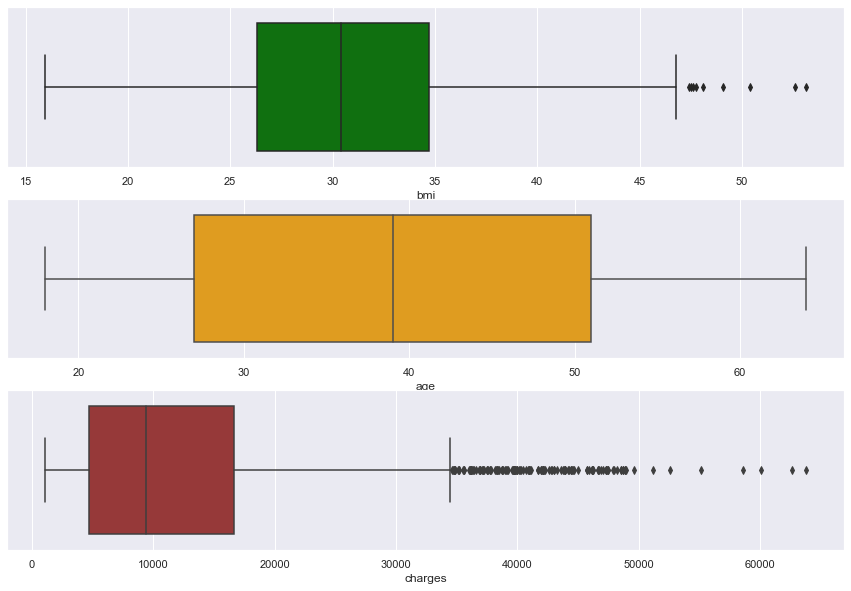

In [5]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='green')
plt.subplot(3,1,2)
sns.boxplot(x=df.age, color='orange')
plt.subplot(3,1,3)
sns.boxplot(x=df.charges, color='brown')
plt.show()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
All the statistics seem reasonable.

Age column: data looks representative of the true age distribution of the adult population with (39) mean.

Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

SyntaxError: invalid syntax (1506194024.py, line 1)

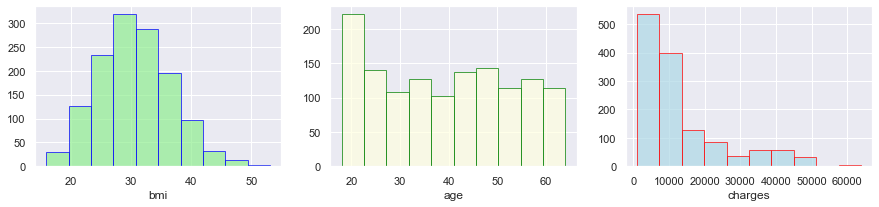

In [9]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightgreen', edgecolor = 'blue', alpha = 0.7)
plt.xlabel('bmi')
plt.subplot(3,3,2)
plt.hist(df.age, color='lightyellow', edgecolor = 'green', alpha = 0.7)
plt.xlabel('age')
plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'red', alpha = 0.7)
plt.xlabel('charges')
plt.show()

In [10]:
bmi looks normally distributed.

Age looks uniformly distributed.

As seen in the previous step, charges are highly skewed.

SyntaxError: invalid syntax (2224247175.py, line 1)

In [11]:
Skewness = Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                                   index=['bmi', 'age', 'charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [12]:
Skewness of bmi is very low as seen in the previous step

age is uniformly distributed and thus not skewed

charges are highly skewed

SyntaxError: invalid syntax (3063344137.py, line 1)

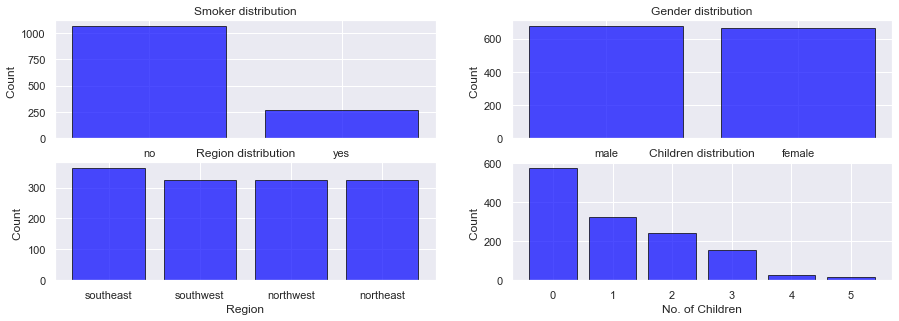

In [13]:
plt.figure(figsize=(15,10))
x =df.smoker.value_counts().index
y =[df['smoker'].value_counts()[i] for i in x]
plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')
x1 =df.sex.value_counts().index
y1 =[df['sex'].value_counts()[j] for j in x1]
plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')
x2 =df.region.value_counts().index
y2 =[df['region'].value_counts()[k] for k in x2]
plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Region distribution')
x3 =df.children.value_counts().index
y3 =[df['children'].value_counts()[l] for l in x3]
plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('No. of Children')
plt.ylabel('Count ')
plt.title('Children distribution')
plt.show()

In [14]:
There are lot more non-smokers than smokers.

Instances are distributed evenly accross all regions.

Gender is also distributed evenly.

Most instances have less than 3 children and very few have 4 or 5 children.

SyntaxError: invalid syntax (4254752553.py, line 1)

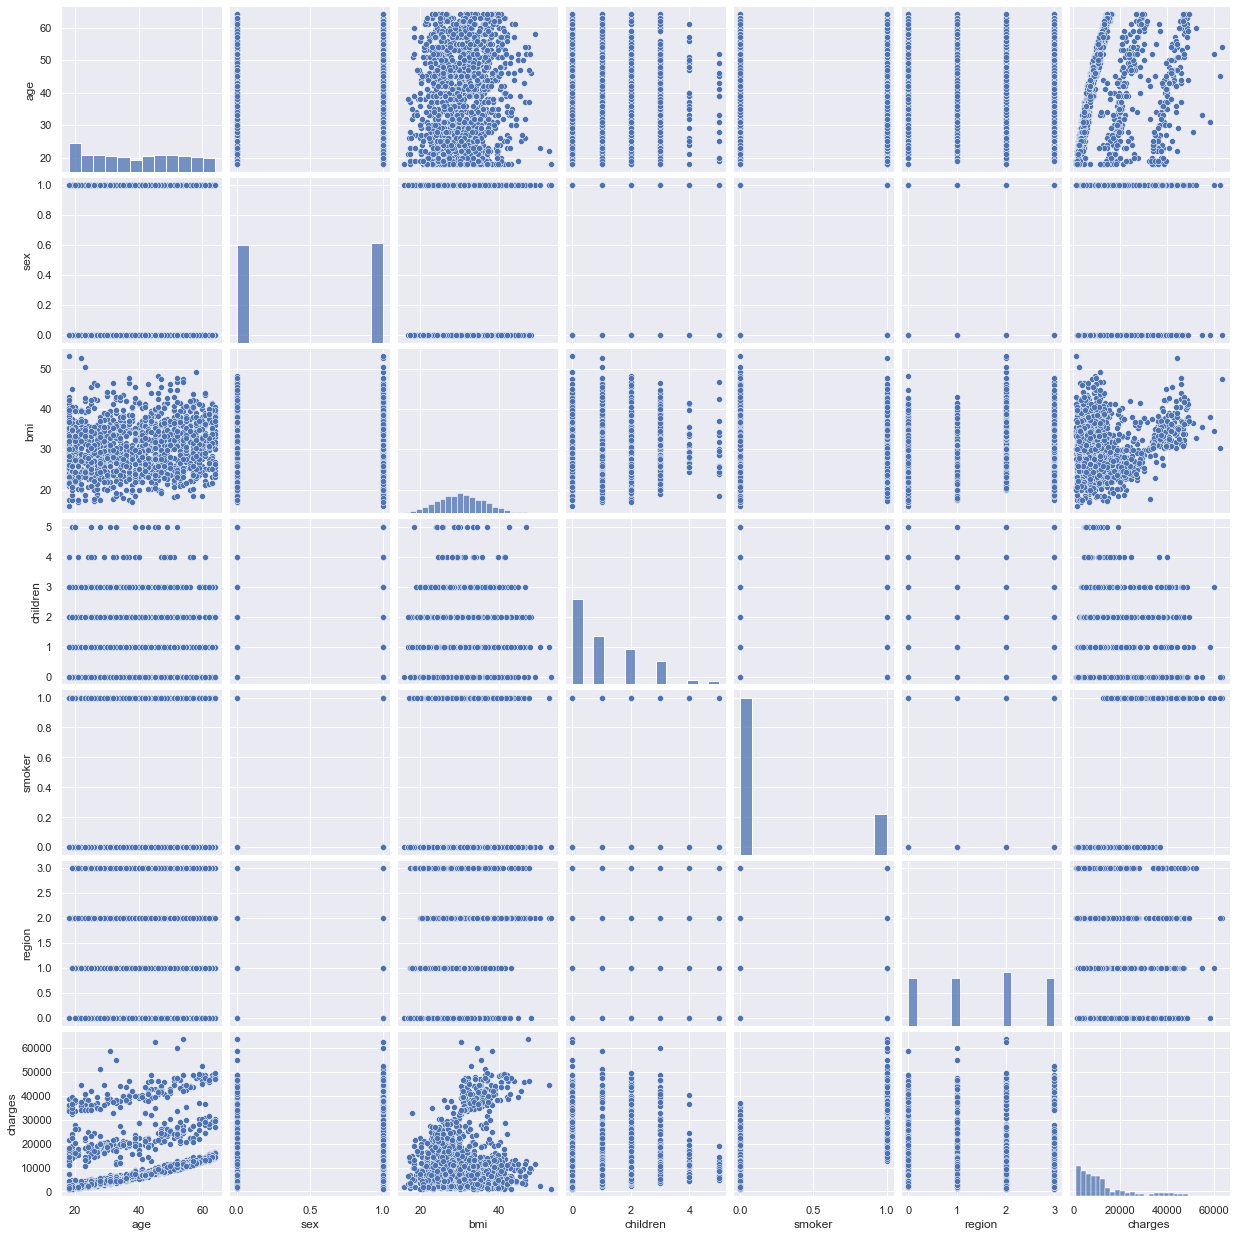

In [15]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] =df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)
plt.show()

In [16]:
There is an obvious correlation between 'charges' and 'smoker'

Looks like smokers claimed more money than non-smokers

There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones.

SyntaxError: invalid syntax (1928740934.py, line 1)

In [17]:
print("Do charges of people who smoke differ significantly from the people who don't?")
df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\roger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


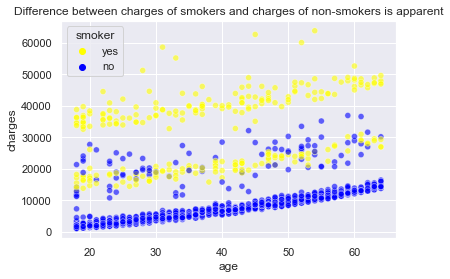

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(df.age,df.charges,hue=df.smoker,palette= ['yellow','blue'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

C:\Users\roger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

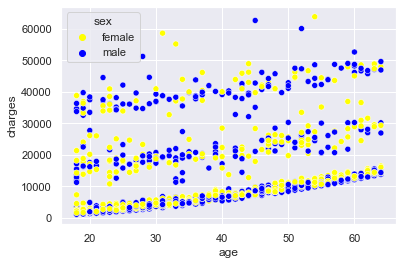

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(df.age,df.charges,hue=df.sex,palette= ['yellow','blue'] )

In [21]:
Ho = "Charges of smoker and non-smoker are same"
Ha = "Charges of smoker and non-smoker are not the same"
x = np.array(df[df.smoker =='yes'].charges)
y = np.array(df[df.smoker =='no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0)
if p_value < 5/100:
    print(f'{Ha} as the p_value ({p_value}) < 5/100')
else:
    print(f'{Ho} as the p_value ({p_value}) > 5/100')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 5/100


In [22]:
print ("Does bmi of males differ significantly from that of females?")
df.sex.value_counts()

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [23]:
Ho = "Gender has no effect on smoking habits"
Ha = "Gender has an effect on smoking habits"
crosstab = pd.crosstab(df['sex'],df['smoker'])
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
if p_value < 5/100:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 5/100')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 5/100')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 5/100


smoker,no,yes
sex,,
female,547,115
male,517,159


In [24]:
Ho = "Region has no effect on smoking habits" 
Ha = "Region has an effect on smoking habits"
crosstab = pd.crosstab(df['smoker'],df['region'])
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
if p_value < 5/100:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 5/100')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 5/100')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 5/100


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [25]:
Ho = "No. of children has no effect on bmi"
Ha = "No. of children has an effect on bmi"
female_df = copy.deepcopy(df[df['sex'] == 'female'])
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
if p_value < 5/100:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 5/100')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 5/100')

No. of children has no effect on bmi as the p_value (0.716) > 5/100


In [ ]:
Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05 and Smokers seem to claim significantly more money than non-smokers
Gender has no effect on bmi as the p_value (0.09) > 0.05, BMI of both gender are identical.
Gender has an effect on smoking habits as the p_value (0.007) < 0.05 and Proportion of smokers in males is significantly different from that of the females.
Region has no effect on smoking habits as the p_value (0.062) > 0.05
No. of children has no effect on bmi as the p_value (0.716) > 0.05